# Boas Práticas de Programação - Python

## Tópicos

   - Quando usar e quando não usar o comando for
   - Comentários
   - f-strings
   - Compreensão de listas

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('../Database/pagamentos.csv')
df

,cpf,data_vencimento,data_pagamento,valor_fatura,idade
0,0,20220328,20220427,1000.0,30
1,1,20220328,20220426,1000.0,30
2,2,20220328,20220428,1000.0,30
3,3,20220328,20220429,1000.0,30
4,4,20220328,20220430,1000.0,30
5,5,20220328,20220501,1000.0,30
6,6,20220328,20220502,1000.0,30
7,7,20220328,20220503,1000.0,30
8,8,20220328,20220504,1000.0,31
9,9,20220328,20220505,1050.0,31


# Quando **usar** e quando **evitar** o comando ``for``

Problema: identificar pessoas que fizeram pagamento com > 5 dias de atraso.

In [3]:
df.head()

,cpf,data_vencimento,data_pagamento,valor_fatura,idade
0,0,20220328,20220427,1000.0,30
1,1,20220328,20220426,1000.0,30
2,2,20220328,20220428,1000.0,30
3,3,20220328,20220429,1000.0,30
4,4,20220328,20220430,1000.0,30


In [4]:
data_vencimento = 20220328
data_pagamento = 20220324

dt_vencimento = datetime.datetime.strptime(str(data_vencimento), '%Y%m%d')
dt_pagamento = datetime.datetime.strptime(str(data_pagamento), '%Y%m%d')

if (dt_pagamento - dt_vencimento).days > 5:
    vencido_mais_5_dias = 1
else:
    vencido_mais_5_dias = 0

vencido_mais_5_dias

0

## Solução 01: usando ``for``

In [5]:
vencido_mais_5_dias = []

for i, row in df.iterrows():
    data_vencimento = str(row['data_vencimento'])
    data_pagamento = str(row['data_pagamento'])

    # Remover parte decimal (se houver)
    data_vencimento = data_vencimento.split('.')[0]
    data_pagamento = data_pagamento.split('.')[0]

    # Verificar se a data está no formato esperado
    if len(data_vencimento) == 8 and len(data_pagamento) == 8:
        dt_vencimento = datetime.datetime.strptime(data_vencimento, '%Y%m%d')
        dt_pagamento = datetime.datetime.strptime(data_pagamento, '%Y%m%d')

        if (dt_pagamento - dt_vencimento).days > 5:
            vencido_mais_5_dias.append(1)
        else:
            vencido_mais_5_dias.append(0)
    else:
        vencido_mais_5_dias.append(0)  # ou outra ação apropriada para lidar com datas mal formatadas


In [6]:
vencido_mais_5_dias

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [7]:
vencido_mais_5_dias[:5]

[1, 1, 1, 1, 1]

In [8]:
df.head()

,cpf,data_vencimento,data_pagamento,valor_fatura,idade
0,0,20220328,20220427,1000.0,30
1,1,20220328,20220426,1000.0,30
2,2,20220328,20220428,1000.0,30
3,3,20220328,20220429,1000.0,30
4,4,20220328,20220430,1000.0,30


In [9]:
df['vencido_mais_5_dias'] = vencido_mais_5_dias

In [10]:
df.head()

,cpf,data_vencimento,data_pagamento,valor_fatura,idade,vencido_mais_5_dias
0,0,20220328,20220427,1000.0,30,1
1,1,20220328,20220426,1000.0,30,1
2,2,20220328,20220428,1000.0,30,1
3,3,20220328,20220429,1000.0,30,1
4,4,20220328,20220430,1000.0,30,1


In [11]:
%%timeit
vencido_mais_5_dias = []

for i, row in df.iterrows():
    data_vencimento = str(row['data_vencimento'])
    data_pagamento = str(row['data_pagamento'])

    # Remover parte decimal (se houver)
    data_vencimento = data_vencimento.split('.')[0]
    data_pagamento = data_pagamento.split('.')[0]

    # Verificar se a data está no formato esperado
    if len(data_vencimento) == 8 and len(data_pagamento) == 8:
        dt_vencimento = datetime.datetime.strptime(data_vencimento, '%Y%m%d')
        dt_pagamento = datetime.datetime.strptime(data_pagamento, '%Y%m%d')

        if (dt_pagamento - dt_vencimento).days > 5:
            vencido_mais_5_dias.append(1)
        else:
            vencido_mais_5_dias.append(0)
    else:
        vencido_mais_5_dias.append(0)  # ou outra ação apropriada para lidar com datas mal formatadas

1.78 ms ± 60.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Solução 02: usando ``df.apply``

In [12]:
df = pd.read_csv('../Database/pagamentos.csv')

In [13]:
def calcula_vencido_mais_5_dias(row):
    vencido_mais_5_dias = []
    
    data_vencimento = str(row['data_vencimento'])
    data_pagamento = str(row['data_pagamento'])
    
    # Remover parte decimal (se houver)
    data_vencimento = data_vencimento.split('.')[0]
    data_pagamento = data_pagamento.split('.')[0]
    
    dt_vencimento = datetime.datetime.strptime(str(data_vencimento), '%Y%m%d')
    dt_pagamento = datetime.datetime.strptime(str(data_pagamento), '%Y%m%d')
    
    if (dt_pagamento - dt_vencimento).days > 5:
        return 1
    else:
        return 0

In [14]:
df.apply(calcula_vencido_mais_5_dias, axis=1)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
dtype: int64

In [15]:
df['vencido_mais_5_dias'] = df.apply(calcula_vencido_mais_5_dias, axis=1)

In [16]:
df.head()

,cpf,data_vencimento,data_pagamento,valor_fatura,idade,vencido_mais_5_dias
0,0,20220328,20220427,1000.0,30,1
1,1,20220328,20220426,1000.0,30,1
2,2,20220328,20220428,1000.0,30,1
3,3,20220328,20220429,1000.0,30,1
4,4,20220328,20220430,1000.0,30,1


In [17]:
%%timeit
df.apply(calcula_vencido_mais_5_dias, axis=1)

1.54 ms ± 652 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Solução 03: usando operações vetorais

In [18]:
df = pd.read_csv('../Database/pagamentos.csv')

In [19]:
df['data_vencimento']

0     20220328
1     20220328
2     20220328
3     20220328
4     20220328
5     20220328
6     20220328
7     20220328
8     20220328
9     20220328
10    20220328
11    20220328
12    20220328
13    20220328
14    20220328
15    20220328
16    20220328
17    20220328
18    20220328
19    20220328
20    20220328
21    20220328
22    20220328
23    20220328
24    20220328
25    20220328
26    20220328
27    20220328
28    20220328
29    20220328
30    20220328
Name: data_vencimento, dtype: int64

In [20]:
pd.to_datetime(df['data_vencimento'], format='%Y%m%d')

0    2022-03-28
1    2022-03-28
2    2022-03-28
3    2022-03-28
4    2022-03-28
5    2022-03-28
6    2022-03-28
7    2022-03-28
8    2022-03-28
9    2022-03-28
10   2022-03-28
11   2022-03-28
12   2022-03-28
13   2022-03-28
14   2022-03-28
15   2022-03-28
16   2022-03-28
17   2022-03-28
18   2022-03-28
19   2022-03-28
20   2022-03-28
21   2022-03-28
22   2022-03-28
23   2022-03-28
24   2022-03-28
25   2022-03-28
26   2022-03-28
27   2022-03-28
28   2022-03-28
29   2022-03-28
30   2022-03-28
Name: data_vencimento, dtype: datetime64[ns]

In [21]:
dt_vencimento = pd.to_datetime(df['data_vencimento'], format='%Y%m%d')
dt_pagamento = pd.to_datetime(df['data_pagamento'], format='%Y%m%d')

dt_pagamento - dt_vencimento

0    30 days
1    29 days
2    31 days
3    32 days
4    33 days
5    34 days
6    35 days
7    36 days
8    37 days
9    38 days
10   39 days
11   40 days
12   41 days
13   42 days
14   43 days
15   44 days
16   45 days
17   46 days
18   47 days
19   48 days
20   49 days
21   50 days
22   51 days
23   52 days
24   53 days
25   54 days
26   55 days
27   56 days
28   57 days
29   58 days
30   59 days
dtype: timedelta64[ns]

In [22]:
(dt_pagamento - dt_vencimento).dt.days

0     30
1     29
2     31
3     32
4     33
5     34
6     35
7     36
8     37
9     38
10    39
11    40
12    41
13    42
14    43
15    44
16    45
17    46
18    47
19    48
20    49
21    50
22    51
23    52
24    53
25    54
26    55
27    56
28    57
29    58
30    59
dtype: int64

In [23]:
dias_vencido = (dt_pagamento - dt_vencimento).dt.days
(dias_vencido > 5).astype(int)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
dtype: int32

In [24]:
vencido_mais_5_dias = (dias_vencido > 5).astype(int)

In [25]:
df['vencido_mais_5_dias'] = vencido_mais_5_dias

In [26]:
df.head()

,cpf,data_vencimento,data_pagamento,valor_fatura,idade,vencido_mais_5_dias
0,0,20220328,20220427,1000.0,30,1
1,1,20220328,20220426,1000.0,30,1
2,2,20220328,20220428,1000.0,30,1
3,3,20220328,20220429,1000.0,30,1
4,4,20220328,20220430,1000.0,30,1


In [27]:
%%timeit
dt_vencimento = pd.to_datetime(df['data_vencimento'], format='%Y%m%d')
dt_pagamento = pd.to_datetime(df['data_pagamento'], format='%Y%m%d')

dias_vencido = (dt_pagamento - dt_vencimento).dt.days
(dias_vencido > 5).astype(int)

840 µs ± 137 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Repetindo testes com grande volume de dados

## Solução 01: usando ``for``

In [28]:
df = pd.read_csv('../Database/pagamentos.csv')
df = pd.concat([df] * 1000)

In [29]:
df

,cpf,data_vencimento,data_pagamento,valor_fatura,idade
0,0,20220328,20220427,1000.0,30
1,1,20220328,20220426,1000.0,30
2,2,20220328,20220428,1000.0,30
3,3,20220328,20220429,1000.0,30
4,4,20220328,20220430,1000.0,30
...,...,...,...,...,...
26,26,20220328,20220522,1063.0,45
27,27,20220328,20220523,1064.0,46
28,28,20220328,20220524,1065.0,47
29,29,20220328,20220525,1066.0,48


In [30]:
%%time
vencido_mais_5_dias = []

for i, row in df.iterrows():
    data_vencimento = str(row['data_vencimento'])
    data_pagamento = str(row['data_pagamento'])

    # Remover parte decimal (se houver)
    data_vencimento = data_vencimento.split('.')[0]
    data_pagamento = data_pagamento.split('.')[0]

    # Verificar se a data está no formato esperado
    if len(data_vencimento) == 8 and len(data_pagamento) == 8:
        dt_vencimento = datetime.datetime.strptime(data_vencimento, '%Y%m%d')
        dt_pagamento = datetime.datetime.strptime(data_pagamento, '%Y%m%d')

        if (dt_pagamento - dt_vencimento).days > 5:
            vencido_mais_5_dias.append(1)
        else:
            vencido_mais_5_dias.append(0)
    else:
        vencido_mais_5_dias.append(0)  # ou outra ação apropriada para lidar com datas mal formatadas

CPU times: total: 859 ms
Wall time: 2.38 s


## Solução 02: usando ``df.apply``

In [31]:
df = pd.read_csv('../Database/pagamentos.csv')
df = pd.concat([df] * 1000)

In [32]:
%%time
df.apply(calcula_vencido_mais_5_dias, axis=1)

CPU times: total: 609 ms
Wall time: 1.09 s


0     1
1     1
2     1
3     1
4     1
     ..
26    1
27    1
28    1
29    1
30    1
Length: 31000, dtype: int64

## Solução 03: usando operações vetorais

In [33]:
df = pd.read_csv('../Database/pagamentos.csv')
df = pd.concat([df] * 1000)

In [34]:
%%time
dt_vencimento = pd.to_datetime(df['data_vencimento'], format='%Y%m%d')
dt_pagamento = pd.to_datetime(df['data_pagamento'], format='%Y%m%d')

dias_vencido = (dt_pagamento - dt_vencimento).dt.days
(dias_vencido > 5).astype(int)

CPU times: total: 0 ns
Wall time: 4.38 ms


0     1
1     1
2     1
3     1
4     1
     ..
26    1
27    1
28    1
29    1
30    1
Length: 31000, dtype: int32

## Quando usar ``for``?

In [35]:
df = pd.read_csv('../Database/pagamentos.csv')

In [36]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, n_init='auto')

df['cluster'] = kmeans.fit_predict(df[['valor_fatura', 'idade']])

In [37]:
df.head()

,cpf,data_vencimento,data_pagamento,valor_fatura,idade,cluster
0,0,20220328,20220427,1000.0,30,1
1,1,20220328,20220426,1000.0,30,1
2,2,20220328,20220428,1000.0,30,1
3,3,20220328,20220429,1000.0,30,1
4,4,20220328,20220430,1000.0,30,1


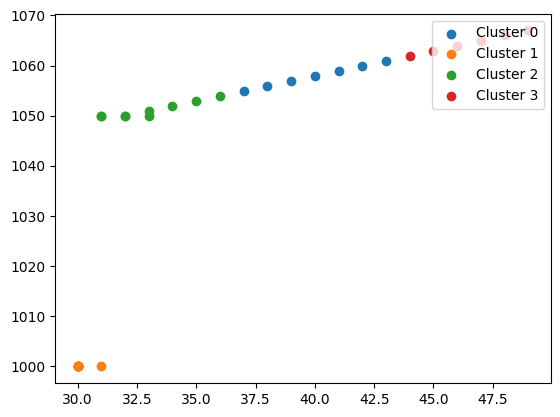

In [38]:
plt.scatter(df.loc[df['cluster'] == 0, 'idade'], df.loc[df['cluster'] == 0, 'valor_fatura'], label='Cluster 0')
plt.scatter(df.loc[df['cluster'] == 1, 'idade'], df.loc[df['cluster'] == 1, 'valor_fatura'], label='Cluster 1')
plt.scatter(df.loc[df['cluster'] == 2, 'idade'], df.loc[df['cluster'] == 2, 'valor_fatura'], label='Cluster 2')
plt.scatter(df.loc[df['cluster'] == 3, 'idade'], df.loc[df['cluster'] == 3, 'valor_fatura'], label='Cluster 3')

plt.legend(loc='upper right');

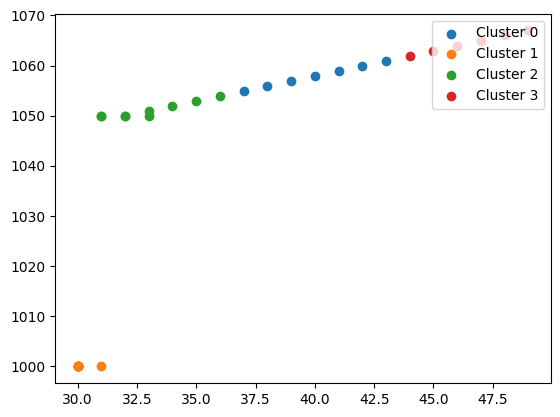

In [39]:
for cluster in range(n_clusters):
    plt.scatter(df.loc[df['cluster'] == cluster, 'idade'], df.loc[df['cluster'] == cluster, 'valor_fatura'], label=f'Cluster {cluster}')

plt.legend(loc='upper right');

## Comentários

In [40]:
df = pd.read_csv('../Database/pagamentos.csv')

In [41]:
df.head()

,cpf,data_vencimento,data_pagamento,valor_fatura,idade
0,0,20220328,20220427,1000.0,30
1,1,20220328,20220426,1000.0,30
2,2,20220328,20220428,1000.0,30
3,3,20220328,20220429,1000.0,30
4,4,20220328,20220430,1000.0,30


In [42]:
df['anomes_vecimento'] = (df['data_vencimento'] / 100).astype(int)
df['anomes_pagamento'] = (df['data_pagamento'] / 100).astype(int)

df_filtrado = df.loc[df['anomes_vecimento'] >= 202202]

In [43]:
# gera anomes_vencimento retirando os dias da coluna data_vencimento
df['anomes_vecimento'] = (df['data_vencimento'] / 100).astype(int)

# gera anomes_pagamento retirando os dias da coluna data_pagamento
df['anomes_pagamento'] = (df['data_pagamento'] / 100).astype(int)

# filtra o dataframe para pegar apenas datas a partir do mês 202202 (fevereiro de 2022)
df_filtrado = df.loc[df['anomes_vecimento'] >= 202202]

In [44]:
df_filtrado

,cpf,data_vencimento,data_pagamento,valor_fatura,idade,anomes_vecimento,anomes_pagamento
0,0,20220328,20220427,1000.0,30,202203,202204
1,1,20220328,20220426,1000.0,30,202203,202204
2,2,20220328,20220428,1000.0,30,202203,202204
3,3,20220328,20220429,1000.0,30,202203,202204
4,4,20220328,20220430,1000.0,30,202203,202204
5,5,20220328,20220501,1000.0,30,202203,202205
6,6,20220328,20220502,1000.0,30,202203,202205
7,7,20220328,20220503,1000.0,30,202203,202205
8,8,20220328,20220504,1000.0,31,202203,202205
9,9,20220328,20220505,1050.0,31,202203,202205


In [45]:
df['anomes_vecimento'] = (df['data_vencimento'] / 100).astype(int)
df['anomes_pagamento'] = (df['data_pagamento'] / 100).astype(int)

# os dados anteriores a fevereiro de 2022 não são confiáveis devido a erros de processamento
df_filtrado = df.loc[df['anomes_vecimento'] >= 202202]

## f-strings

In [46]:
modelo = 'lightgbm'
safra = 202212

## Usando ``+``

In [47]:
caminho_resultados = 'resultados/resultado_' + str(safra) + '_' + modelo + '.txt'
caminho_resultados

'resultados/resultado_202212_lightgbm.txt'

## Usando ``%``

In [48]:
caminho_resultados = 'resultados/resultado_%d-%s.txt' % (safra, modelo)
caminho_resultados

'resultados/resultado_202212-lightgbm.txt'

## Usando ``.format``

In [49]:
caminho_resultados = 'resultados/resultado_{}-{}.txt'.format(safra, modelo)
caminho_resultados

'resultados/resultado_202212-lightgbm.txt'

In [50]:
caminho_resultados = 'resultados/resultado_{safra}-{modelo}.txt'.format(safra=safra, modelo=modelo)
caminho_resultados

'resultados/resultado_202212-lightgbm.txt'

## Usando ``f-strings``

In [51]:
caminho_resultados = f'resultados/resultado_{safra}_{modelo}.txt'
caminho_resultados

'resultados/resultado_202212_lightgbm.txt'

## Compreensão de listas

Problema: gerar nomes de arquivo csv para cada safra.

In [52]:
safras = [202201, 202202, 202203, 202204, 202205, 202206]

In [53]:
lista_arquivos = [] # 01: criação da lista

for safra in safras:    # 02: iteração
    nome_arquivo = f'arquivo_{safra}.csv'   # 03: criando o elemento da lista
    lista_arquivos.append(nome_arquivo) # 04: adicionando o elemento à lista

In [54]:
lista_arquivos

['arquivo_202201.csv',
 'arquivo_202202.csv',
 'arquivo_202203.csv',
 'arquivo_202204.csv',
 'arquivo_202205.csv',
 'arquivo_202206.csv']

In [55]:
lista_arquivos = [f'arquivo_{safra}.csv' for safra in safras]

In [56]:
lista_arquivos

['arquivo_202201.csv',
 'arquivo_202202.csv',
 'arquivo_202203.csv',
 'arquivo_202204.csv',
 'arquivo_202205.csv',
 'arquivo_202206.csv']

## Problema: gerar nomes de arquivo csv para cada mês **ímpar**

In [57]:
lista_arquivos = [] # 01: criação da lista

for safra in safras:    # 02: iteração
    if safra % 2 == 1:  # 03: condição
        nome_arquivo = f'arquivo_{safra}.csv'   # 04: criando o elemento da lista
        lista_arquivos.append(nome_arquivo) # 05: adicionando o elemento à lista

In [58]:
lista_arquivos

['arquivo_202201.csv', 'arquivo_202203.csv', 'arquivo_202205.csv']

In [59]:
lista_arquivos = [f'arquivo_{safra}.csv' for safra in safras if safra % 2 == 1]

In [60]:
lista_arquivos

['arquivo_202201.csv', 'arquivo_202203.csv', 'arquivo_202205.csv']

## Problema: gerar safras no formato '%Y%m' para cada mês **ímpar** entre 2020 e 2022

In [61]:
lista_arquivos = []

for ano in [2020, 2021, 2022]:
    for mes in range(1, 13):
        if mes % 2 == 1:
            nome_arquivo = f'{ano}{mes}.csv'
            lista_arquivos.append(lista_arquivos)

In [62]:
lista_arquivos

[[...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...]]

In [63]:
lista_arquivos = []

for ano in [2020, 2021, 2022]:
    for mes in range(1, 13):
        if mes % 2 == 1:
            nome_arquivo = f'{ano}{mes:02d}.csv'
            lista_arquivos.append(nome_arquivo)

In [64]:
lista_arquivos

['202001.csv',
 '202003.csv',
 '202005.csv',
 '202007.csv',
 '202009.csv',
 '202011.csv',
 '202101.csv',
 '202103.csv',
 '202105.csv',
 '202107.csv',
 '202109.csv',
 '202111.csv',
 '202201.csv',
 '202203.csv',
 '202205.csv',
 '202207.csv',
 '202209.csv',
 '202211.csv']

In [65]:
lista_arquivos = [f'{ano}{mes:02d}.csv' for ano in [2020, 2021, 2022] for mes in range(1, 13) if mes % 2 == 1]

In [66]:
lista_arquivos

['202001.csv',
 '202003.csv',
 '202005.csv',
 '202007.csv',
 '202009.csv',
 '202011.csv',
 '202101.csv',
 '202103.csv',
 '202105.csv',
 '202107.csv',
 '202109.csv',
 '202111.csv',
 '202201.csv',
 '202203.csv',
 '202205.csv',
 '202207.csv',
 '202209.csv',
 '202211.csv']